In [1]:
"""Produce an affinity map between vector output and a particular vector"""
import numpy as np
import tensorflow as tf 
import h5py
import matplotlib.pyplot as plt
import os

from skimage import measure

import utils
import nearest_vectors

%load_ext autoreload
%autoreload 2

os.environ['CUDA_VISIBLE_DEVICES'] = '0'

ROOT = '/usr/people/kluther/Projects/metric_segmentation/'

In [2]:
%%javascript
require(
        ["notebook/js/outputarea"],
        function (oa) {
            oa.OutputArea.auto_scroll_threshold = -1;
            console.log("Setting auto_scroll_threshold to -1");
        });

<IPython.core.display.Javascript object>

In [89]:
"""Load data"""
em_imgs  = h5py.File(os.path.join(ROOT, 'data', 'voronoi_boundary.h5'), 'r')['main']
seg_imgs = h5py.File(os.path.join(ROOT, 'data', 'voronoi_segmentation.h5'), 'r')['main']

em_imgs_train = em_imgs[:16]
seg_imgs_train = seg_imgs[:16]
em_imgs_dev = em_imgs[16:]
seg_imgs_dev = seg_imgs[16:]


In [3]:
"""Load data"""
em_imgs  = h5py.File(os.path.join(ROOT, 'data', 'image.h5'), 'r')['main']
seg_imgs = h5py.File(os.path.join(ROOT, 'data', 'human_labels_split.h5'), 'r')['main']

em_imgs_train = em_imgs[:192]
seg_imgs_train = seg_imgs[:192]
em_imgs_dev = em_imgs[192:]
seg_imgs_dev = seg_imgs[192:]


In [4]:
"""Load model"""
N = 40000 #Iteration number
#EXP_NAME = 'j_loss_boundary_map_input_affinity_1_mask_on'
#EXP_NAME = 'j_loss_boundary_msk_on_split_objects'
EXP_NAME = 'j_loss_embed_dim_32_affinity_128'
#EXP_NAME = 'boundary_mask_off_augment_on'
MODEL_NAME = os.path.join(ROOT, 'experiments', EXP_NAME, 'models', 'model{}.ckpt'.format(N))

tf.reset_default_graph()
sess = tf.Session()
inputs, outputs = utils.load_model(MODEL_NAME, sess)

INFO:tensorflow:Restoring parameters from /usr/people/kluther/Projects/metric_segmentation/experiments/j_loss_embed_dim_32_affinity_128/models/model40000.ckpt


In [5]:
def affinity(x,y):
    return np.exp(-0.5*np.linalg.norm(x-y, axis=-1)**2)

## Affinity map between mean vector of chosen object and subsequent slices ##

In [10]:
"""Generate mean vectors for each object in given image"""
centroids_dev, vectors_dev = {}, {} 

slc_ID = 30 # MUST BE POSITIVE
slc_ID2 = 31
slc_ID3 = 32
em_img, seg_img = em_imgs_dev[slc_ID][:572,:572], seg_imgs_dev[slc_ID][92:572-92,92:572-92]
vec_img = utils.generate_vector_labels(inputs, outputs, em_img, sess)
centroids, vectors = nearest_vectors.find_object_ids_centroids_vectors([seg_img], [vec_img])

centroids = [(2**20*slc_ID+ID, val) for ID,val in centroids.items()]
vectors = [(2**20*slc_ID+ID, val) for ID,val in vectors.items()]
centroids_dev.update(centroids)
vectors_dev.update(vectors)

In [11]:
"""Generate vector labels for a given image"""
em_dev = em_imgs_dev[slc_ID, 0:572, 0:572]
seg_dev = seg_imgs_dev[slc_ID, 0:572, 0:572]
vec_dev = utils.generate_vector_labels(inputs, outputs, em_dev, sess)

em_dev2 = em_imgs_dev[slc_ID2, 0:572, 0:572]
seg_dev2 = seg_imgs_dev[slc_ID2, 0:572, 0:572]
vec_dev2 = utils.generate_vector_labels(inputs, outputs, em_dev2, sess)

em_dev3 = em_imgs_dev[slc_ID3, 0:572, 0:572]
seg_dev3 = seg_imgs_dev[slc_ID3, 0:572, 0:572]
vec_dev3 = utils.generate_vector_labels(inputs, outputs, em_dev3, sess)

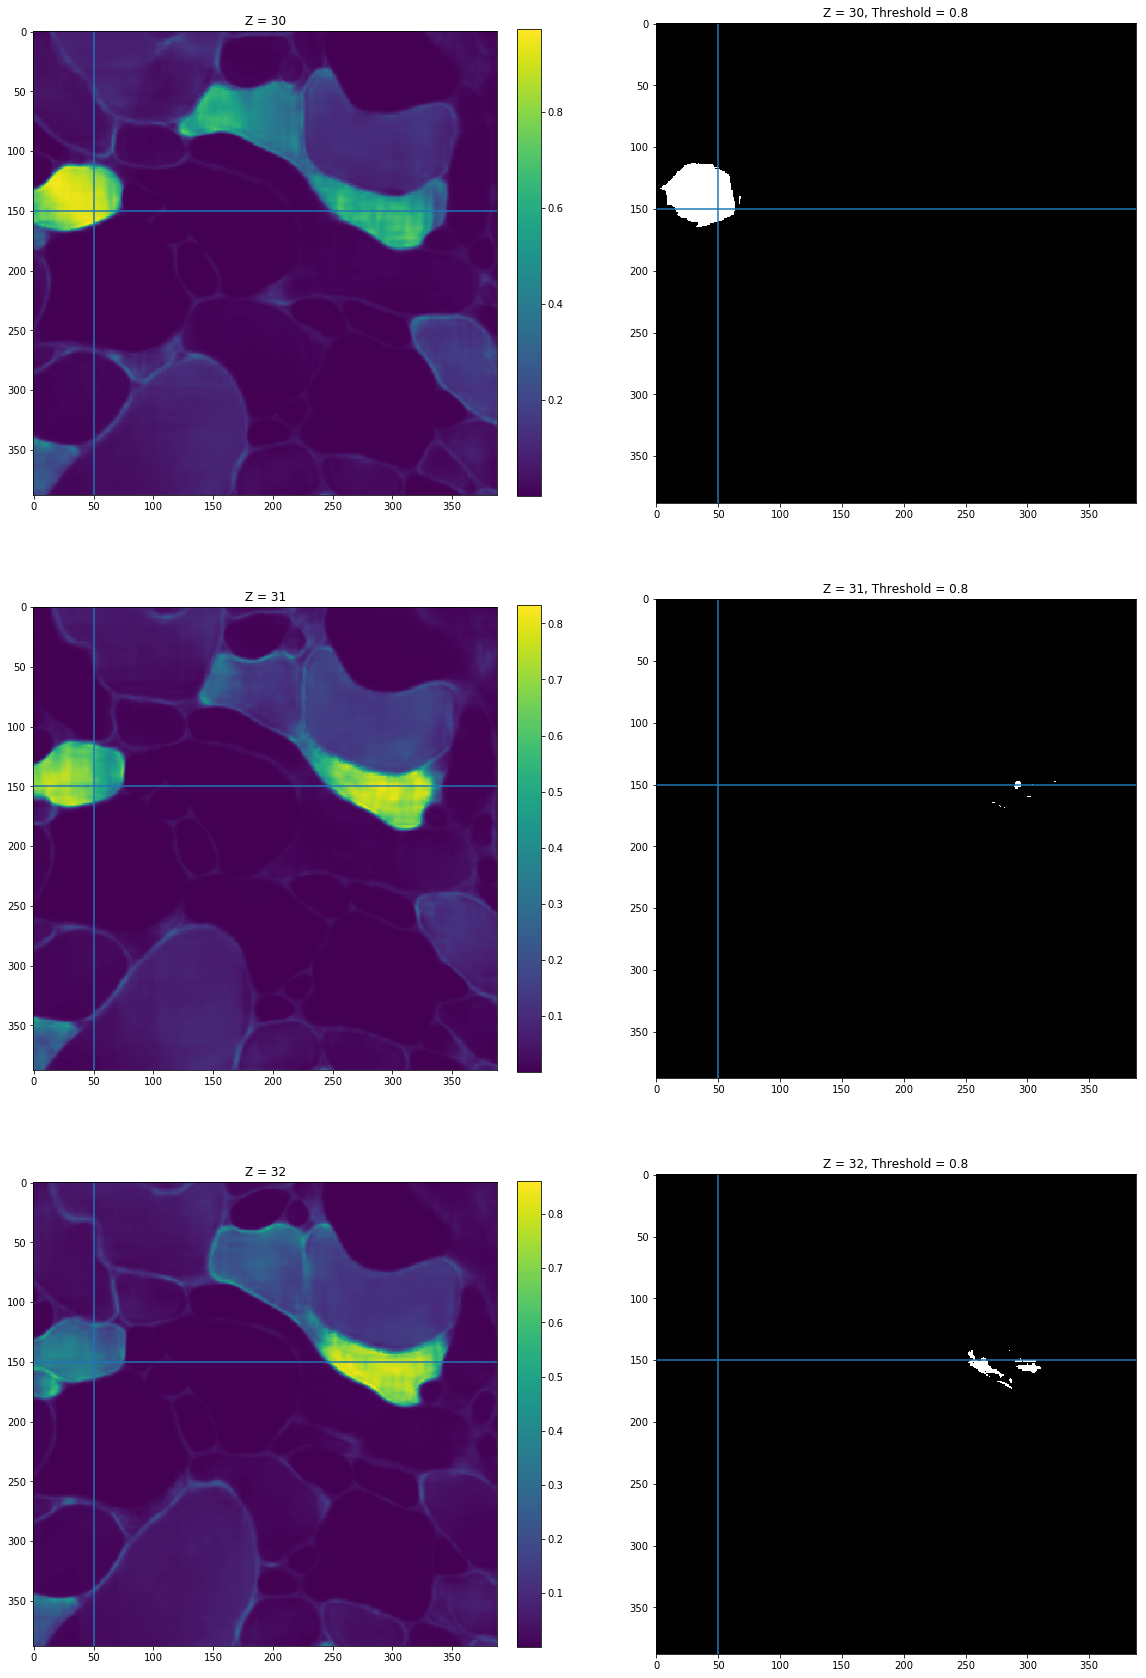

In [15]:
"""Show affinity maps for chosen vectors"""
# Chose vectors
# N = 20,21,22
c1 = (210,160)
#c1 = (75, 300)
#c1 = (360,350)
#c1 = (175,140)
#c1 = (300,50)
#c1=(150,50)
#c1=(195,165)
#c1 = (125,175)
#c1 = (160,300)

# N=30,31,32
c1 = (50,200)
c1 = (50,300)
c1 = (150,50)
v1 = vectors_dev[2**20*slc_ID + seg_img[c1[0], c1[1]]]

thresh = 0.8

plt.figure(figsize=(20,30))
amap = affinity(v1, vec_dev)
plt.subplot(321)
plt.title("Z = {}".format(slc_ID))
plt.imshow(amap)
plt.colorbar(fraction=0.046, pad=0.04)
plt.axhline(c1[0])
plt.axvline(c1[1])

plt.subplot(322)
plt.title("Z = {}, Threshold = {}".format(slc_ID, thresh))
plt.imshow(amap>thresh,cmap='gray')
plt.axhline(c1[0])
plt.axvline(c1[1])

amap = affinity(v1, vec_dev2)
plt.subplot(323)
plt.title("Z = {}".format(slc_ID2))
plt.imshow(amap)
plt.colorbar(fraction=0.046, pad=0.04)
plt.axhline(c1[0])
plt.axvline(c1[1])

plt.subplot(324)
plt.title("Z = {}, Threshold = {}".format(slc_ID2, thresh))
plt.imshow(amap>thresh,cmap='gray')
plt.axhline(c1[0])
plt.axvline(c1[1])

amap = affinity(v1, vec_dev3)
plt.subplot(325)
plt.title("Z = {}".format(slc_ID3))
plt.imshow(amap)
plt.colorbar(fraction=0.046, pad=0.04)
plt.axhline(c1[0])
plt.axvline(c1[1])

plt.subplot(326)
plt.title("Z = {}, Threshold = {}".format(slc_ID3, thresh))
plt.imshow(amap>thresh,cmap='gray')
plt.axhline(c1[0])
plt.axvline(c1[1])

plt.show()

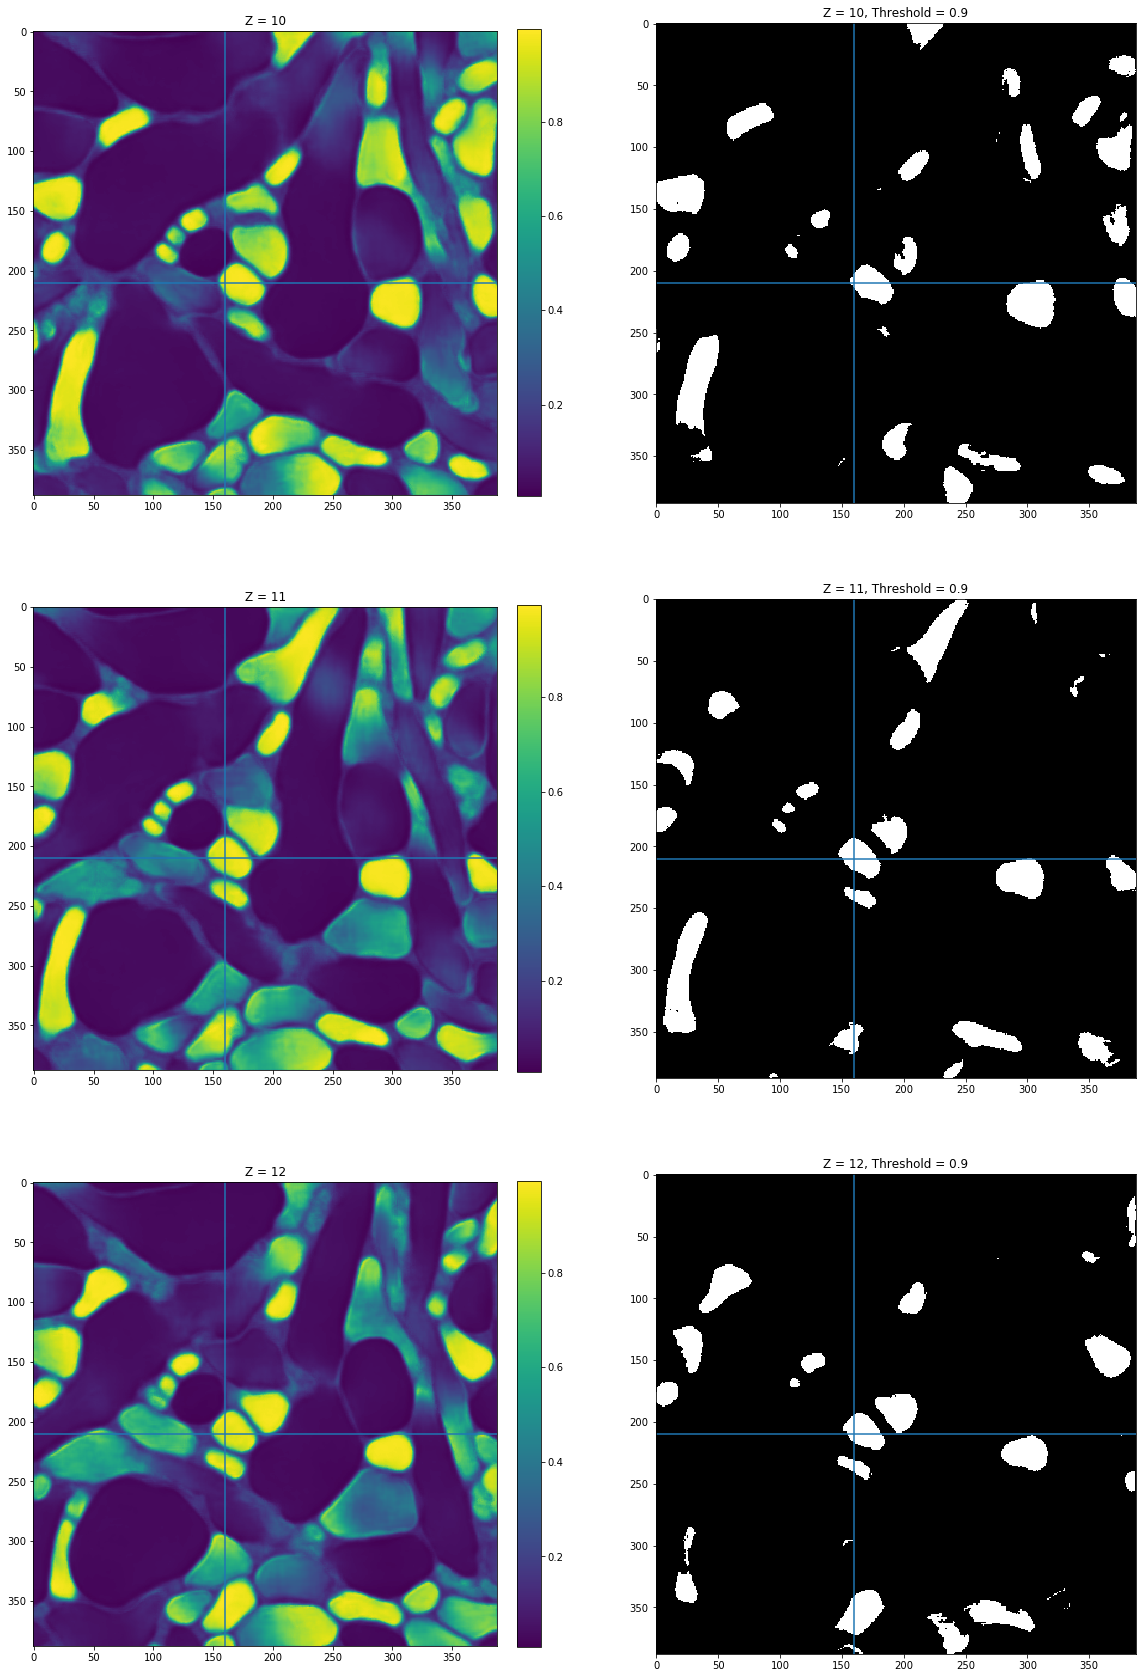

In [8]:
"""Show affinity maps for chosen vectors"""
# Chose vectors
c1 = (210,160)
v1 = vectors_dev[2**20*slc_ID + seg_img[c1[0], c1[1]]]

thresh = 0.9

plt.figure(figsize=(20,30))
amap = affinity(v1, vec_dev)
plt.subplot(321)
plt.title("Z = {}".format(slc_ID))
plt.imshow(amap)
plt.colorbar(fraction=0.046, pad=0.04)
plt.axhline(c1[0])
plt.axvline(c1[1])

plt.subplot(322)
plt.title("Z = {}, Threshold = {}".format(slc_ID, thresh))
plt.imshow(amap>thresh,cmap='gray')
plt.axhline(c1[0])
plt.axvline(c1[1])

amap = affinity(v1, vec_dev2)
plt.subplot(323)
plt.title("Z = {}".format(slc_ID2))
plt.imshow(amap)
plt.colorbar(fraction=0.046, pad=0.04)
plt.axhline(c1[0])
plt.axvline(c1[1])

plt.subplot(324)
plt.title("Z = {}, Threshold = {}".format(slc_ID2, thresh))
plt.imshow(amap>thresh,cmap='gray')
plt.axhline(c1[0])
plt.axvline(c1[1])

amap = affinity(v1, vec_dev3)
plt.subplot(325)
plt.title("Z = {}".format(slc_ID3))
plt.imshow(amap)
plt.colorbar(fraction=0.046, pad=0.04)
plt.axhline(c1[0])
plt.axvline(c1[1])

plt.subplot(326)
plt.title("Z = {}, Threshold = {}".format(slc_ID3, thresh))
plt.imshow(amap>thresh,cmap='gray')
plt.axhline(c1[0])
plt.axvline(c1[1])

plt.show()

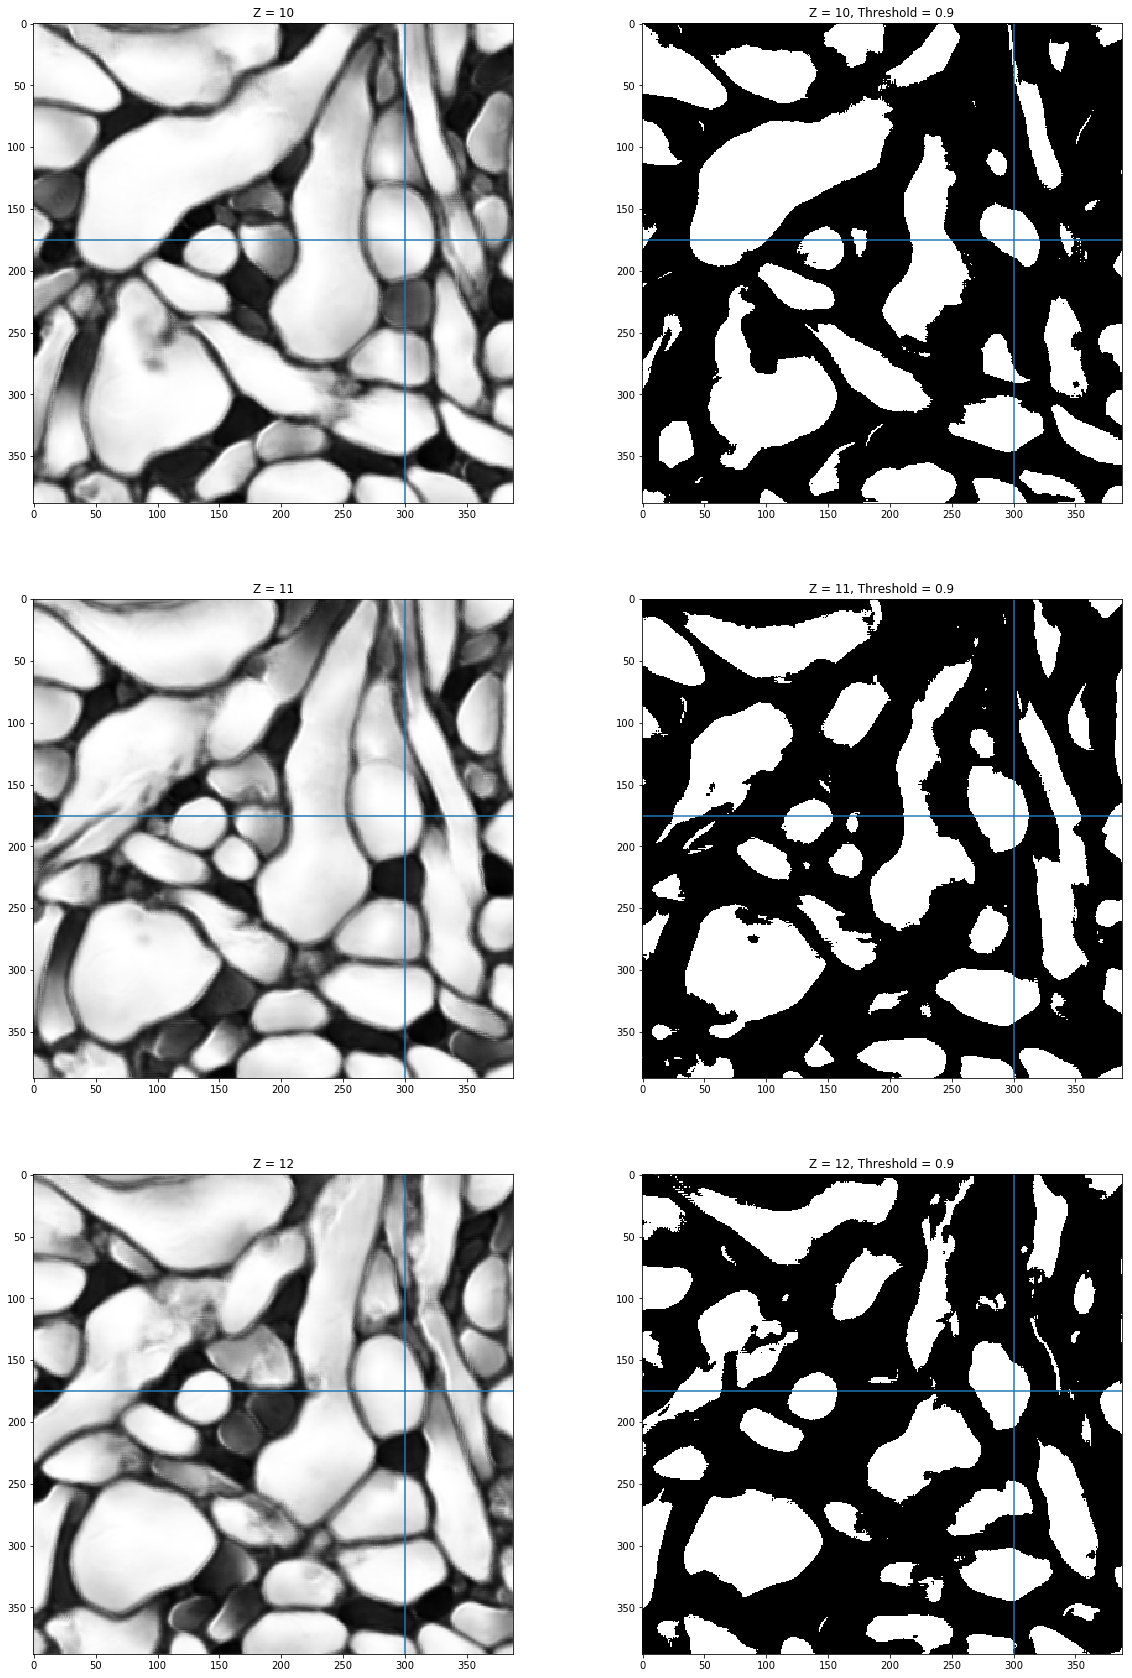

In [121]:
"""Show affinity maps for chosen vectors"""
# Chose vectors
c1 = (175,300)
v1 = vectors_dev[2**20*slc_ID + seg_img[c1[0], c1[1]]]

thresh = 0.9

plt.figure(figsize=(20,30))
amap = affinity(v1, vec_dev)
plt.subplot(321)
plt.title("Z = {}".format(slc_ID))
plt.imshow(amap,cmap='gray')
plt.axhline(c1[0])
plt.axvline(c1[1])

plt.subplot(322)
plt.title("Z = {}, Threshold = {}".format(slc_ID, thresh))
plt.imshow(amap>thresh,cmap='gray')
plt.axhline(c1[0])
plt.axvline(c1[1])

amap = affinity(v1, vec_dev2)
plt.subplot(323)
plt.title("Z = {}".format(slc_ID2))
plt.imshow(amap,cmap='gray')
plt.axhline(c1[0])
plt.axvline(c1[1])

plt.subplot(324)
plt.title("Z = {}, Threshold = {}".format(slc_ID2, thresh))
plt.imshow(amap>thresh,cmap='gray')
plt.axhline(c1[0])
plt.axvline(c1[1])

amap = affinity(v1, vec_dev3)
plt.subplot(325)
plt.title("Z = {}".format(slc_ID3))
plt.imshow(amap,cmap='gray')
plt.axhline(c1[0])
plt.axvline(c1[1])

plt.subplot(326)
plt.title("Z = {}, Threshold = {}".format(slc_ID3, thresh))
plt.imshow(amap>thresh,cmap='gray')
plt.axhline(c1[0])
plt.axvline(c1[1])

plt.show()

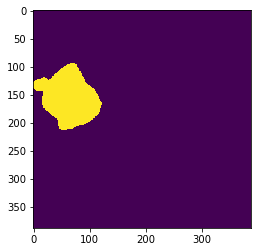

In [80]:
plt.imshow(seg_dev[92:480, 92:480]==3074);plt.show()

In [29]:
x.shape

(1, 1, 388, 388, 1)

In [27]:
import sys; sys.path.append('/usr/people/kluther/Projects/metric_segmentation/src/')

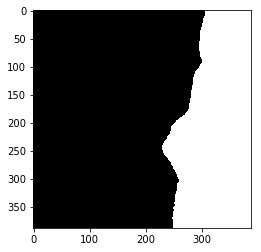

In [33]:
x =np.load('/usr/people/kluther/Projects/metric_segmentation/src/train_215_339690.90625.npy')
plt.imshow(x.reshape(388,388), cmap='gray');plt.show()